# 7. Interpreting a Tree Model

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os

In [2]:
df = pd.read_csv(r'.\data\PC_data.txt', sep = '\s+')
df.columns = map(str.lower, df.columns)
df = df.drop('id', axis = 1)
df.head()

,nclaims,amount,avg,exp,coverage,fuel,use,fleet,sex,ageph,bm,agec,power,pc,town,long,lat
0,1,1618.001036,1618.001036,1.000000,TPL,gasoline,private,N,male,50,5,12,77,1000,BRUSSEL,4.355223,50.845386
1,0,0.000000,NaN,1.000000,PO,gasoline,private,N,female,64,5,3,66,1000,BRUSSEL,4.355223,50.845386
2,0,0.000000,NaN,1.000000,TPL,diesel,private,N,male,60,0,10,70,1000,BRUSSEL,4.355223,50.845386
3,0,0.000000,NaN,1.000000,TPL,gasoline,private,N,male,77,0,15,57,1000,BRUSSEL,4.355223,50.845386
4,1,155.974606,155.974606,0.046575,TPL,gasoline,private,N,female,28,9,7,70,1000,BRUSSEL,4.355223,50.845386


In [3]:
# converting type(str) columns to categorical
df['coverage'] = df['coverage'].astype('category').cat.codes
df['fleet'] = df['fleet'].astype('category').cat.codes
df['sex'] = df['sex'].astype('category').cat.codes
df['town'] = df['town'].astype('category').cat.codes
df['fuel'] = df['fuel'].astype('category').cat.codes
df['use'] = df['use'].astype('category').cat.codes

In [4]:
exp = df['exp']
y = np.array(df['nclaims']/df['exp'])
x = np.array(df[['ageph','agec','bm','power','coverage','fuel','sex','fleet','use']])
col_names = ['ageph','agec','bm','power','coverage','fuel','sex','fleet','use']

In [5]:
from sklearn import metrics
from sklearn import tree

In [24]:
rgf_dt = tree.DecisionTreeRegressor(criterion="mse", max_depth = 3,
                                      max_features = 'auto',
                                      min_samples_split = 10,
                                      min_samples_leaf = 10,
                                      ccp_alpha = 0, splitter="best").fit(x,y,exp)

In [25]:
text_representation = tree.export_text(rgf_dt, feature_names = col_names)
print(text_representation)

|--- bm <= 6.50
|   |--- bm <= 1.50
|   |   |--- ageph <= 55.50
|   |   |   |--- value: [0.12]
|   |   |--- ageph >  55.50
|   |   |   |--- value: [0.09]
|   |--- bm >  1.50
|   |   |--- ageph <= 57.50
|   |   |   |--- value: [0.15]
|   |   |--- ageph >  57.50
|   |   |   |--- value: [0.12]
|--- bm >  6.50
|   |--- bm <= 10.50
|   |   |--- ageph <= 26.50
|   |   |   |--- value: [0.24]
|   |   |--- ageph >  26.50
|   |   |   |--- value: [0.19]
|   |--- bm >  10.50
|   |   |--- agec <= 6.50
|   |   |   |--- value: [0.23]
|   |   |--- agec >  6.50
|   |   |   |--- value: [0.29]



Method ```feature_importances_()``` provides the importance of a feature as the (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance.

In [26]:
# get importance
importance = rgf_dt.feature_importances_
# summarize feature importance
for i,(v,s) in enumerate(zip(col_names, importance)):
    print(f'Feature: {v}, Score: {s}')

Feature: ageph, Score: 0.08305980025319501
Feature: agec, Score: 0.017491585276182237
Feature: bm, Score: 0.8994486144706227
Feature: power, Score: 0.0
Feature: coverage, Score: 0.0
Feature: fuel, Score: 0.0
Feature: sex, Score: 0.0
Feature: fleet, Score: 0.0
Feature: use, Score: 0.0


### 7.1 One-way Partial Dependence

In [19]:
from sklearn.inspection import plot_partial_dependence
df_x = df[['ageph','agec','bm','power','coverage','fuel','sex','fleet','use']]

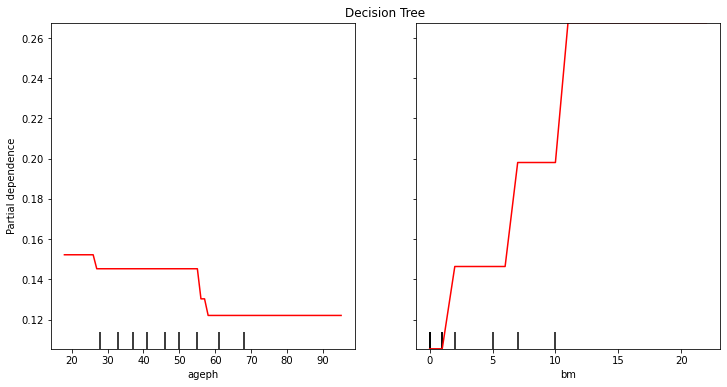

In [31]:
%matplotlib inline
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_title("Decision Tree")
tree_disp = plot_partial_dependence(rgf_dt, df_x, ['ageph','bm'], kind='average', ax=ax, line_kw={'color': 'red'})

### 7.2 Two-way Partial Dependence

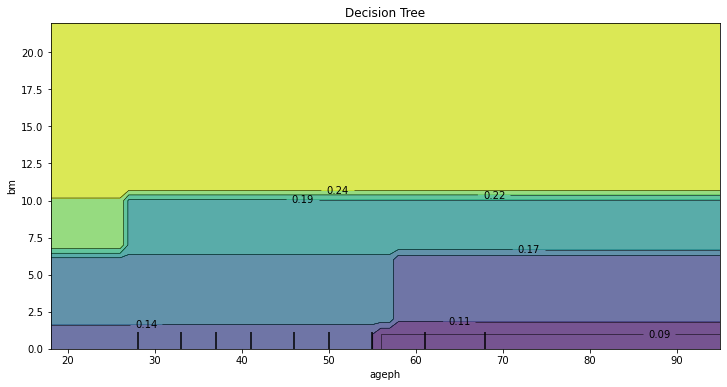

In [21]:
%matplotlib inline
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_title("Decision Tree")
tree_disp = plot_partial_dependence(rgf_dt, df_x, [('ageph','bm')], kind='average', ax=ax, line_kw={'color': 'red'})